<a href="https://colab.research.google.com/github/RafaelTorresCH/Signal-theory/blob/main/class%20notebooks/example_calculate_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib numpy

Coeficientes de la serie de Fourier (a_n):
a0 (DC) = 0.500000
a1 =  0.636620


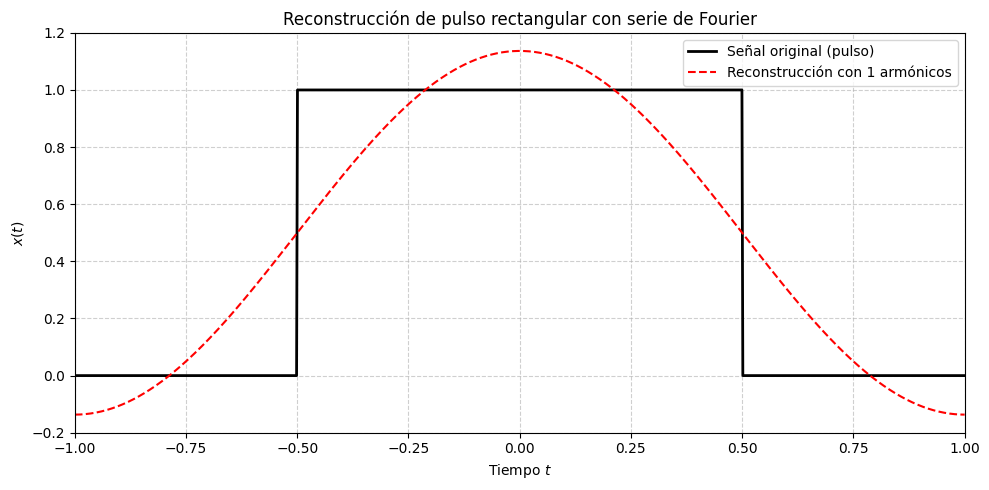

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0          # Ancho del pulso
T0 = 2 * T       # Período de repetición (duty cycle = T/T0 = 0.5)
N_harm = 1      # Número de armónicos a usar (n = 1 a N_harm)

# Rango de tiempo para graficar (un período)
t = np.linspace(-T0/2, T0/2, 1000)

# Señal original (un pulso rectangular periódico, mostramos un ciclo)
x_original = np.where(np.abs(t) <= T/2, 1.0, 0.0)

# Coeficiente DC (a0)
a0 = T / T0

# Inicializar reconstrucción
x_recon = np.full_like(t, a0)  # Empieza con el valor DC

# Calcular y sumar armónicos
print("Coeficientes de la serie de Fourier (a_n):")
print(f"a0 (DC) = {a0:.6f}")
for n in range(1, N_harm + 1):
    an = (2 / (n * np.pi)) * np.sin(n * np.pi * T / T0)
    print(f"a{n} = {an: .6f}")
    # Sumar el n-ésimo armónico
    x_recon += an * np.cos(n * 2 * np.pi * t / T0)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t, x_original, 'k', linewidth=2, label='Señal original (pulso)')
plt.plot(t, x_recon, 'r--', linewidth=1.5, label=f'Reconstrucción con {N_harm} armónicos')
plt.title('Reconstrucción de pulso rectangular con serie de Fourier')
plt.xlabel('Tiempo $t$')
plt.ylabel('$x(t)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(-0.2, 1.2)
plt.xlim(-T0/2, T0/2)
plt.tight_layout()
plt.show()

Coeficientes b_n de la serie de Fourier (solo senos):
b1 =  0.636620
b2 = -0.318310
b3 =  0.212207


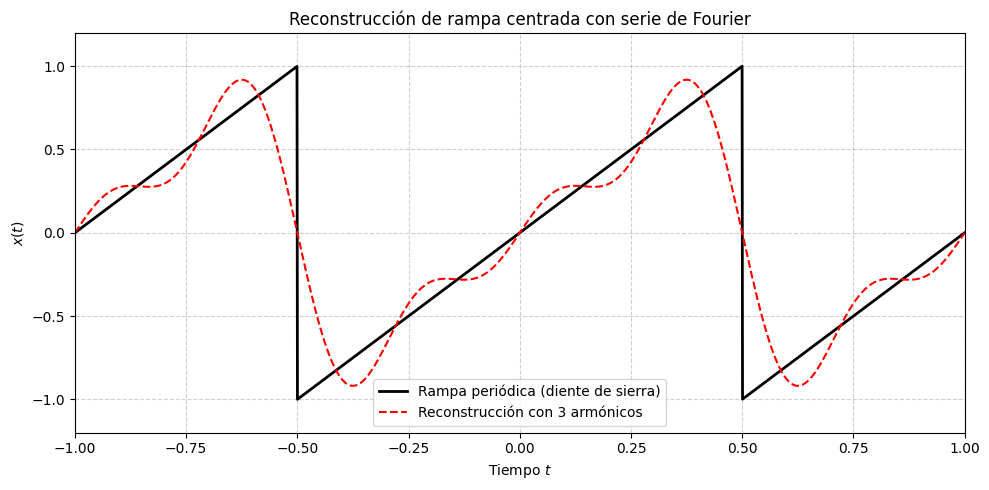

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0          # Período y ancho del pulso/rampa
N_harm = 3      # Número de armónicos

# Tiempo: mostramos un poco más de un período para ver la periodicidad
t = np.linspace(-T, T, 2000)

# Señal original: rampa periódica (onda diente de sierra)
# Usamos la función "sawtooth" de scipy o la definimos manualmente
# Aquí la definimos manualmente para evitar dependencias
def sawtooth_centered(t, T):
    # Normaliza t al intervalo [-T/2, T/2)
    t_norm = ((t + T/2) % T) - T/2
    return (2 / T) * t_norm

x_original = sawtooth_centered(t, T)

# Reconstrucción con serie de Fourier
x_recon = np.zeros_like(t)

print("Coeficientes b_n de la serie de Fourier (solo senos):")
for n in range(1, N_harm + 1):
    bn = (2 / (n * np.pi)) * ((-1) ** (n + 1))  # = 2*(-1)^(n+1)/(n*pi)
    print(f"b{n} = {bn: .6f}")
    x_recon += bn * np.sin(2 * np.pi * n * t / T)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t, x_original, 'k', linewidth=2, label='Rampa periódica (diente de sierra)')
plt.plot(t, x_recon, 'r--', linewidth=1.5, label=f'Reconstrucción con {N_harm} armónicos')
plt.title('Reconstrucción de rampa centrada con serie de Fourier')
plt.xlabel('Tiempo $t$')
plt.ylabel('$x(t)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(-1.2, 1.2)
plt.xlim(-T, T)
plt.tight_layout()
plt.show()

Por favor, sube tu archivo CSV:


Saving sample_101_sensor-fault-detection (1).csv to sample_101_sensor-fault-detection (1).csv
Archivo cargado: sample_101_sensor-fault-detection (1).csv


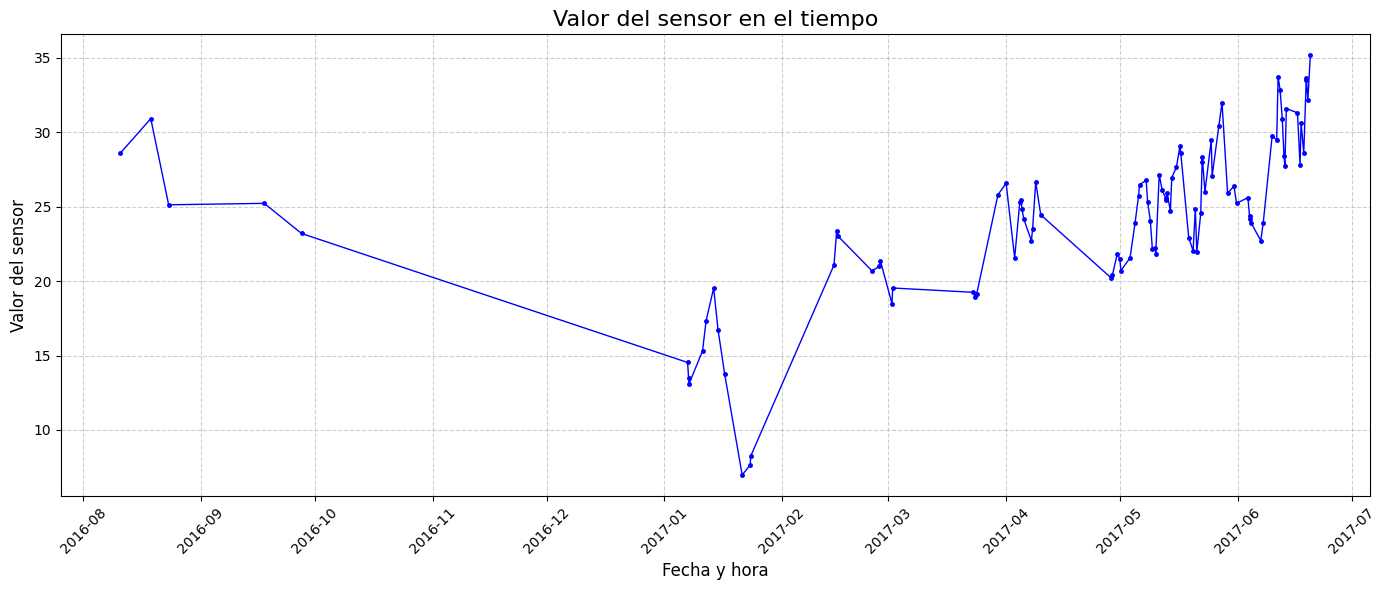


Resumen estadístico:
count    100.000000
mean      24.255098
std        5.453880
min        6.981698
25%       21.562141
50%       24.839457
75%       27.660892
max       35.170280
Name: Value, dtype: float64


In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Paso 2: Subir archivo desde tu computadora
print("Por favor, sube tu archivo CSV:")
uploaded = files.upload()

# Obtener el nombre del archivo subido (asumimos que solo subes uno)
filename = list(uploaded.keys())[0]
print(f"Archivo cargado: {filename}")

# Paso 3: Leer el CSV (usando ';' como separador)
df = pd.read_csv(filename, sep=';')

# Paso 4: Convertir Timestamp a datetime y ordenar
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Paso 5: Graficar
plt.figure(figsize=(14, 6))
plt.plot(df['Timestamp'], df['Value'], 'b.-', linewidth=1, markersize=5)
plt.title('Valor del sensor en el tiempo', fontsize=16)
plt.xlabel('Fecha y hora', fontsize=12)
plt.ylabel('Valor del sensor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Opcional: Mostrar estadísticas básicas
print("\nResumen estadístico:")
print(df['Value'].describe())

In [ ]:
!pip install statsmodels

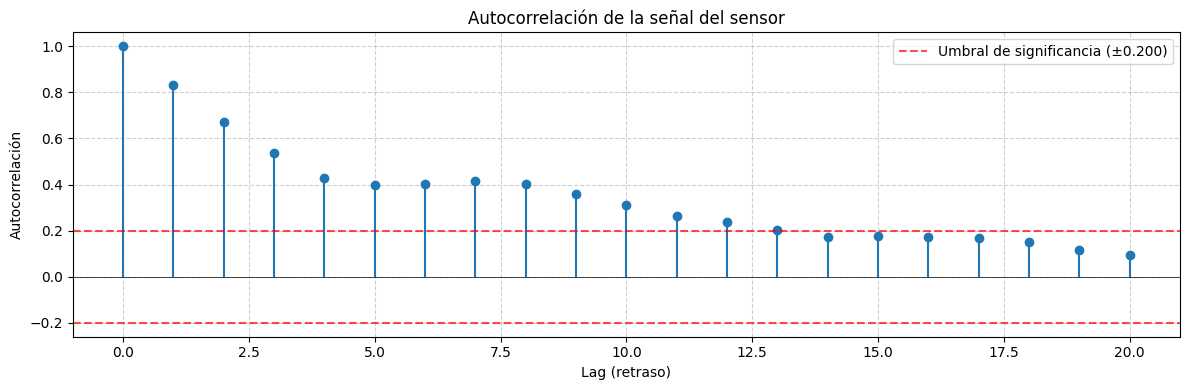

Número de observaciones: 100
Autocorrelación en lag 1: 0.8323
→ Alta persistencia: los valores están fuertemente correlacionados con el instante anterior.


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# Asegurarse de que el índice sea el tiempo (opcional)
df_acf = df.set_index('Timestamp')

# Extraer los valores
values = df_acf['Value'].values

# Calcular autocorrelación
max_lag = min(30, len(values) // 5)
acf_vals = acf(values, nlags=max_lag, fft=True)

# Graficar autocorrelación (versión compatible con Matplotlib reciente)
plt.figure(figsize=(12, 4))
lags = np.arange(len(acf_vals))
plt.stem(lags, acf_vals, basefmt=" ", linefmt='C0-', markerfmt='C0o')  # Sin use_line_collection
plt.title('Autocorrelación de la señal del sensor')
plt.xlabel('Lag (retraso)')
plt.ylabel('Autocorrelación')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0, color='k', linewidth=0.5)

# Líneas de significancia (±2/√N)
N = len(values)
conf_int = 2 / np.sqrt(N)
plt.axhline(y=conf_int, color='r', linestyle='--', alpha=0.7, label=f'Umbral de significancia (±{conf_int:.3f})')
plt.axhline(y=-conf_int, color='r', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Interpretación
print(f"Número de observaciones: {N}")
print(f"Autocorrelación en lag 1: {acf_vals[1]:.4f}")
if acf_vals[1] > 0.5:
    print("→ Alta persistencia: los valores están fuertemente correlacionados con el instante anterior.")
elif acf_vals[1] < 0.1:
    print("→ Baja persistencia: poca relación entre valores consecutivos.")
else:
    print("→ Persistencia moderada.")

Señal interpolada: 1254 puntos, muestreo cada 6 horas.


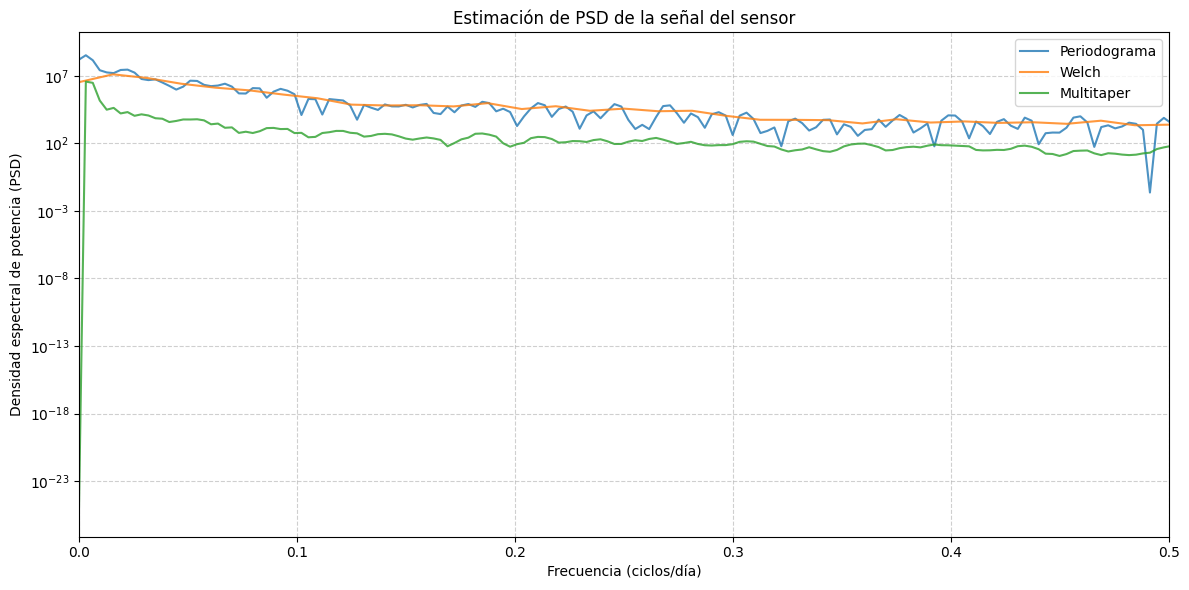

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram, welch, windows
from scipy.interpolate import interp1d

# --- Paso 1: Preparar datos uniformemente muestreados ---
df_sorted = df.sort_values('Timestamp').reset_index(drop=True)
df_sorted['Timestamp'] = pd.to_datetime(df_sorted['Timestamp'])

# Convertir a segundos desde el inicio para interpolación
t_original = (df_sorted['Timestamp'] - df_sorted['Timestamp'].iloc[0]).dt.total_seconds().values
y_original = df_sorted['Value'].values

# Definir nueva frecuencia de muestreo: cada 6 horas = 6*3600 segundos
fs_new = 1 / (6 * 3600)  # Hz (muestreo cada 6 horas)
dt_new = 6 * 3600  # segundos
t_new = np.arange(t_original[0], t_original[-1], dt_new)

# Interpolación lineal
f_interp = interp1d(t_original, y_original, kind='linear', fill_value="extrapolate")
y_new = f_interp(t_new)

# Eliminar NaN si los hay
valid = np.isfinite(y_new)
t_new = t_new[valid]
y_new = y_new[valid]

print(f"Señal interpolada: {len(y_new)} puntos, muestreo cada 6 horas.")

# --- Paso 2: Estimación de PSD ---

# Frecuencia de muestreo en Hz
fs = 1 / dt_new  # ~4.63e-5 Hz

# 1. Periodograma
f_p, Pxx_p = periodogram(y_new, fs, window='hann', scaling='density')

# 2. Welch
f_w, Pxx_w = welch(y_new, fs, window='hann', nperseg=min(256, len(y_new)//2), scaling='density')

# 3. Multitaper (implementación manual con DPSS)
def multitaper_psd(x, fs, NW=2.5, K=4):
    N = len(x)
    # Generar ventanas de Slepian (DPSS)
    from scipy.signal.windows import dpss
    tapers, eigvals = dpss(N, NW, K, return_ratios=True)
    # Calcular FFT de cada taper aplicado a la señal
    Pxx_mt = np.zeros(len(f_p))
    for k in range(K):
        x_tapered = x * tapers[k]
        f, Pxx = periodogram(x_tapered, fs, window='boxcar', scaling='density')
        Pxx_mt += Pxx * eigvals[k]
    Pxx_mt /= np.sum(eigvals)
    return f, Pxx_mt

# Ajustar NW y K según longitud
N = len(y_new)
NW = 2.5
K = min(4, int(2*NW) - 1)
if K < 1:
    K = 1

f_mt, Pxx_mt = multitaper_psd(y_new, fs, NW=NW, K=K)

# --- Paso 3: Graficar ---
plt.figure(figsize=(12, 6))
plt.semilogy(f_p * 3600 * 24, Pxx_p, label='Periodograma', alpha=0.8)
plt.semilogy(f_w * 3600 * 24, Pxx_w, label='Welch', alpha=0.8)
plt.semilogy(f_mt * 3600 * 24, Pxx_mt, label='Multitaper', alpha=0.8)
plt.xlabel('Frecuencia (ciclos/día)')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.title('Estimación de PSD de la señal del sensor')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 0.5)  # Hasta 0.5 ciclos/día (periodos > 2 días)
plt.tight_layout()
plt.show()

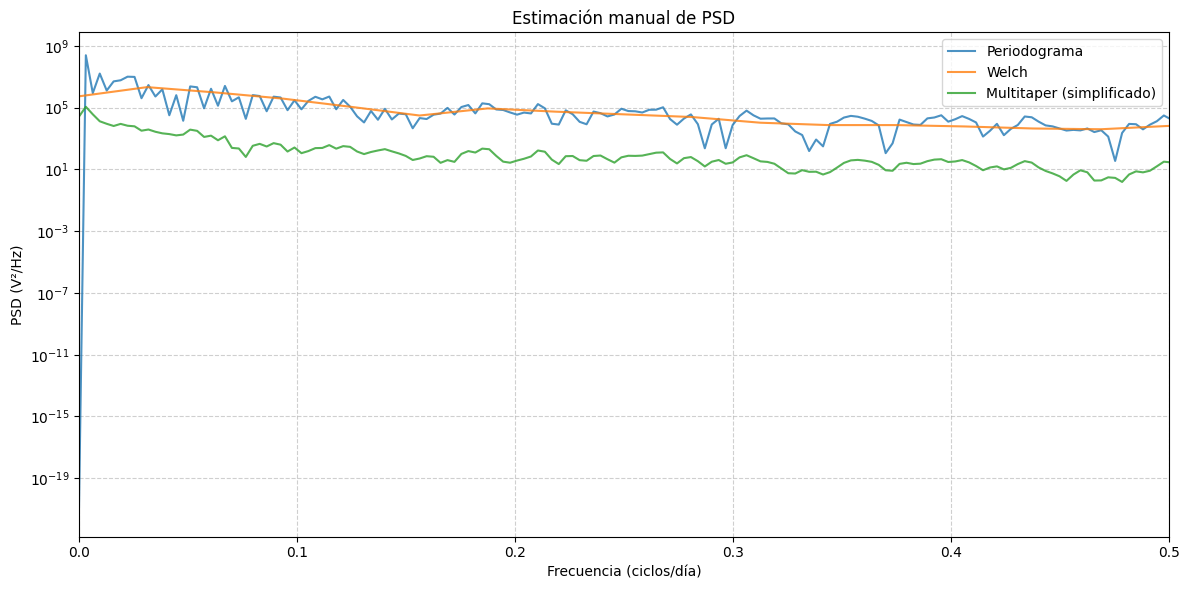

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# -------------------------------------------------
# 1. Cargar y preparar datos (interpolación uniforme)
# -------------------------------------------------
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

t_sec = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds().values
y = df['Value'].values

# Interpolar cada 6 horas
dt = 6 * 3600  # segundos
t_new = np.arange(t_sec[0], t_sec[-1], dt)
f_interp = interp1d(t_sec, y, kind='linear', fill_value="extrapolate")
y_new = f_interp(t_new)
y_new = y_new[np.isfinite(y_new)]

N = len(y_new)
fs = 1.0 / dt  # Hz

# -------------------------------------------------
# 2. Periodograma manual
# -------------------------------------------------
def periodogram_manual(x, fs):
    N = len(x)
    X = np.fft.rfft(x - np.mean(x))  # eliminar DC mejora la visualización
    freqs = np.fft.rfftfreq(N, d=1/fs)
    Pxx = (np.abs(X)**2) / (N * fs)
    return freqs, Pxx

f_p, Pxx_p = periodogram_manual(y_new, fs)

# -------------------------------------------------
# 3. Welch manual
# -------------------------------------------------
def welch_manual(x, fs, nperseg=128, noverlap=None):
    if noverlap is None:
        noverlap = nperseg // 2
    step = nperseg - noverlap
    starts = np.arange(0, len(x) - nperseg + 1, step)
    if len(starts) == 0:
        # Si la señal es muy corta, usa todo
        return periodogram_manual(x, fs)

    # Ventana de Hann
    win = np.hanning(nperseg)
    scale = 1.0 / (fs * (win**2).sum())  # corrección de energía

    Pxx_list = []
    for start in starts:
        segment = x[start:start + nperseg]
        if len(segment) < nperseg:
            segment = np.pad(segment, (0, nperseg - len(segment)), mode='constant')
        segment = segment - np.mean(segment)  # detrend local
        segment_win = segment * win
        X = np.fft.rfft(segment_win)
        Pxx_seg = (np.abs(X)**2) * scale
        Pxx_list.append(Pxx_seg)

    Pxx_avg = np.mean(Pxx_list, axis=0)
    freqs = np.fft.rfftfreq(nperseg, d=1/fs)
    return freqs, Pxx_avg

nperseg = min(128, N // 2)
if nperseg < 8:
    nperseg = N
f_w, Pxx_w = welch_manual(y_new, fs, nperseg=nperseg)

# -------------------------------------------------
# 4. Multitaper simplificado (K=3: constante, seno, coseno en baja f)
# -------------------------------------------------
def multitaper_simple(x, fs, K=3):
    N = len(x)
    x = x - np.mean(x)
    freqs = np.fft.rfftfreq(N, d=1/fs)
    Pxx_total = np.zeros_like(freqs)

    # Ventana 0: rectangular (constante)
    t = np.arange(N)
    tapers = []
    tapers.append(np.ones(N))

    if K > 1:
        # Ventana 1: media onda seno
        tapers.append(np.sin(np.pi * t / (N - 1)))
    if K > 2:
        # Ventana 2: media onda coseno
        tapers.append(np.cos(np.pi * t / (N - 1)))

    # Normalizar ventanas
    tapers = [w / np.linalg.norm(w) for w in tapers[:K]]

    for w in tapers:
        x_w = x * w
        X = np.fft.rfft(x_w)
        Pxx_total += (np.abs(X)**2) / (fs * N)

    Pxx_total /= K
    return freqs, Pxx_total

f_mt, Pxx_mt = multitaper_simple(y_new, fs, K=3)

# -------------------------------------------------
# 5. Graficar
# -------------------------------------------------
# Convertir frecuencia a ciclos/día para interpretación
def to_cycles_per_day(f_hz):
    return f_hz * 3600 * 24

plt.figure(figsize=(12, 6))
plt.semilogy(to_cycles_per_day(f_p), Pxx_p, label='Periodograma', alpha=0.8)
plt.semilogy(to_cycles_per_day(f_w), Pxx_w, label='Welch', alpha=0.8)
plt.semilogy(to_cycles_per_day(f_mt), Pxx_mt, label='Multitaper (simplificado)', alpha=0.8)

plt.xlabel('Frecuencia (ciclos/día)')
plt.ylabel('PSD (V²/Hz)')
plt.title('Estimación manual de PSD')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 0.5)  # hasta 0.5 ciclos/día (periodos > 2 días)
plt.tight_layout()
plt.show()

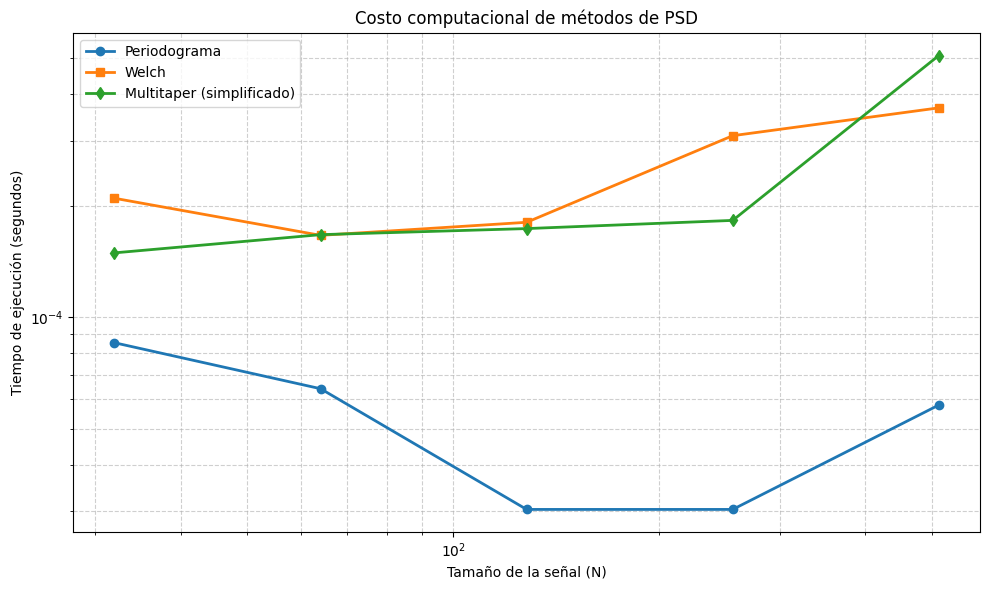


Tamaño de tu señal interpolada: 1024 puntos
Tiempo real (segundos):
  Periodograma:      0.000268 s
  Welch:             0.003909 s
  Multitaper (K=3):  0.000362 s


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.interpolate import interp1d

# --- 1. Cargar y preparar señal base ---
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

t_sec = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds().values
y = df['Value'].values

# Interpolar a alta resolución para luego recortar
t_fine = np.linspace(t_sec[0], t_sec[-1], 1024)
f_interp = interp1d(t_sec, y, kind='linear', fill_value="extrapolate")
y_fine = f_interp(t_fine)
y_fine = y_fine[np.isfinite(y_fine)]

# --- 2. Implementaciones manuales (sin librerías de PSD) ---

def periodogram_manual(x, fs):
    x = x - np.mean(x)
    X = np.fft.rfft(x)
    Pxx = (np.abs(X)**2) / (len(x) * fs)
    return Pxx

def welch_manual(x, fs, nperseg=128, noverlap=None):
    if len(x) < nperseg:
        return periodogram_manual(x, fs)
    if noverlap is None:
        noverlap = nperseg // 2
    step = nperseg - noverlap
    starts = np.arange(0, len(x) - nperseg + 1, step)
    win = np.hanning(nperseg)
    scale = 1.0 / (fs * np.sum(win**2))
    Pxx_list = []
    for start in starts:
        seg = x[start:start+nperseg]
        if len(seg) < nperseg:
            seg = np.pad(seg, (0, nperseg - len(seg)))
        seg = seg - np.mean(seg)
        seg_win = seg * win
        X = np.fft.rfft(seg_win)
        Pxx_list.append((np.abs(X)**2) * scale)
    return np.mean(Pxx_list, axis=0)

def multitaper_simple(x, fs, K=3):
    x = x - np.mean(x)
    N = len(x)
    t = np.arange(N)
    tapers = [np.ones(N)]
    if K > 1:
        tapers.append(np.sin(np.pi * t / (N - 1)))
    if K > 2:
        tapers.append(np.cos(np.pi * t / (N - 1)))
    tapers = [w / np.linalg.norm(w) for w in tapers[:K]]
    Pxx = np.zeros(len(np.fft.rfftfreq(N)))
    for w in tapers:
        X = np.fft.rfft(x * w)
        Pxx += (np.abs(X)**2) / (fs * N)
    return Pxx / K

# --- 3. Medir tiempos ---
sizes = [32, 64, 128, 256, 512]
times_p = []
times_w = []
times_mt = []

fs = 1.0  # Hz (arbitrario, no afecta tiempo)

for N in sizes:
    if N > len(y_fine):
        x = np.interp(np.linspace(0, len(y_fine)-1, N), np.arange(len(y_fine)), y_fine)
    else:
        x = y_fine[:N]

    # Periodograma
    t0 = time.time()
    _ = periodogram_manual(x, fs)
    times_p.append(time.time() - t0)

    # Welch
    nperseg = min(64, len(x) // 2)
    if nperseg < 8:
        nperseg = len(x)
    t0 = time.time()
    _ = welch_manual(x, fs, nperseg=nperseg)
    times_w.append(time.time() - t0)

    # Multitaper
    K = min(3, len(x) // 32 + 1)
    t0 = time.time()
    _ = multitaper_simple(x, fs, K=K)
    times_mt.append(time.time() - t0)

# --- 4. Graficar costo computacional ---
plt.figure(figsize=(10, 6))
plt.loglog(sizes, times_p, 'o-', label='Periodograma', linewidth=2)
plt.loglog(sizes, times_w, 's-', label='Welch', linewidth=2)
plt.loglog(sizes, times_mt, 'd-', label='Multitaper (simplificado)', linewidth=2)
plt.xlabel('Tamaño de la señal (N)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Costo computacional de métodos de PSD')
plt.grid(True, which="both", linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# --- 5. Mostrar tiempos para tu señal real ---
N_real = len(y_fine)
t0 = time.time()
_ = periodogram_manual(y_fine, fs)
t_p_real = time.time() - t0

t0 = time.time()
_ = welch_manual(y_fine, fs, nperseg=min(128, N_real//2))
t_w_real = time.time() - t0

t0 = time.time()
_ = multitaper_simple(y_fine, fs, K=3)
t_mt_real = time.time() - t0

print(f"\nTamaño de tu señal interpolada: {N_real} puntos")
print(f"Tiempo real (segundos):")
print(f"  Periodograma:      {t_p_real:.6f} s")
print(f"  Welch:             {t_w_real:.6f} s")
print(f"  Multitaper (K=3):  {t_mt_real:.6f} s")

(np.float64(-1.0999992182119755),
 np.float64(1.0999997120840732),
 np.float64(-1.099999596995804),
 np.float64(1.099999980809324))

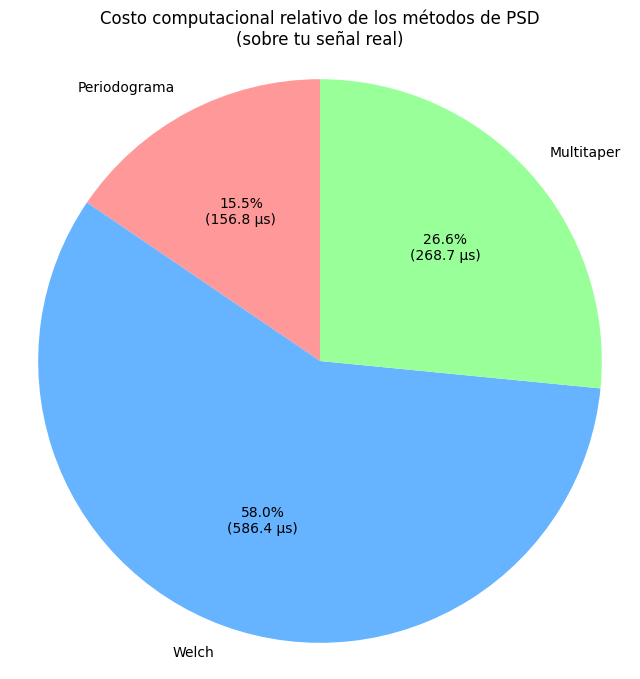

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import interp1d

# --- 1. Cargar y preparar los datos ---
df = pd.read_csv('sample_101_sensor-fault-detection (1).csv', sep=';')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp').reset_index(drop=True)

t_sec = (df['Timestamp'] - df['Timestamp'].iloc[0]).dt.total_seconds().values
y = df['Value'].values

# Interpolar a una cuadrícula uniforme (cada 6 horas)
dt = 6 * 3600
t_new = np.arange(t_sec[0], t_sec[-1], dt)
f_interp = interp1d(t_sec, y, kind='linear', fill_value="extrapolate")
y_new = f_interp(t_new)
y_new = y_new[np.isfinite(y_new)]
fs = 1.0 / dt

# --- 2. Implementaciones manuales ---
def periodogram_manual(x, fs):
    x = x - np.mean(x)
    X = np.fft.rfft(x)
    return (np.abs(X)**2) / (len(x) * fs)

def welch_manual(x, fs, nperseg=128):
    if len(x) < nperseg:
        return periodogram_manual(x, fs)
    noverlap = nperseg // 2
    step = nperseg - noverlap
    starts = np.arange(0, len(x) - nperseg + 1, step)
    win = np.hanning(nperseg)
    scale = 1.0 / (fs * np.sum(win**2))
    Pxx_list = []
    for start in starts:
        seg = x[start:start+nperseg]
        if len(seg) < nperseg:
            seg = np.pad(seg, (0, nperseg - len(seg)))
        seg = seg - np.mean(seg)
        seg_win = seg * win
        X = np.fft.rfft(seg_win)
        Pxx_list.append((np.abs(X)**2) * scale)
    return np.mean(Pxx_list, axis=0)

def multitaper_simple(x, fs, K=3):
    x = x - np.mean(x)
    N = len(x)
    t = np.arange(N)
    tapers = [np.ones(N)]
    if K > 1:
        tapers.append(np.sin(np.pi * t / (N - 1)))
    if K > 2:
        tapers.append(np.cos(np.pi * t / (N - 1)))
    tapers = [w / np.linalg.norm(w) for w in tapers[:K]]
    Pxx = np.zeros(len(np.fft.rfftfreq(N)))
    for w in tapers:
        X = np.fft.rfft(x * w)
        Pxx += (np.abs(X)**2) / (fs * N)
    return Pxx / K

# --- 3. Medir tiempos reales ---
N = len(y_new)
nperseg = min(128, N // 2) if N >= 16 else N

# Periodograma
t0 = time.perf_counter()
_ = periodogram_manual(y_new, fs)
t_p = time.perf_counter() - t0

# Welch
t0 = time.perf_counter()
_ = welch_manual(y_new, fs, nperseg=nperseg)
t_w = time.perf_counter() - t0

# Multitaper
t0 = time.perf_counter()
_ = multitaper_simple(y_new, fs, K=3)
t_mt = time.perf_counter() - t0

# --- 4. Gráfico de torta ---
labels = ['Periodograma', 'Welch', 'Multitaper']
times = [t_p, t_w, t_mt]

# Evitar división por cero si todos los tiempos son ~0
if sum(times) == 0:
    times = [1, 1, 1]  # caso extremo (no debería pasar)

plt.figure(figsize=(8, 8))
plt.pie(times, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({pct/100*sum(times)*1e6:.1f} µs)',
        startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Costo computacional relativo de los métodos de PSD\n(sobre tu señal real)')
plt.axis('equal')